In [39]:
%matplotlib inline
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

In [ ]:
model = YOLO("yolo11m-pose.pt")
results = model("../videos/20240820_105856.mp4")

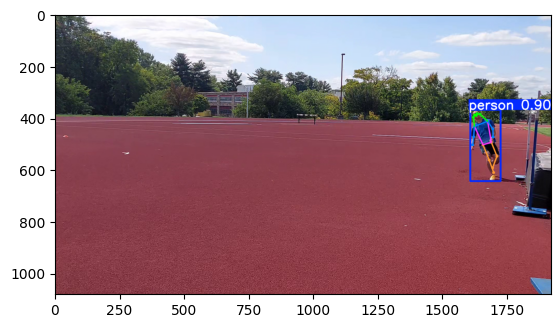

In [43]:
plt.imshow(results[250].plot()[...,::-1])

In [56]:
body_parts = {
    "nose": 0,
    "left_eye": 1, 
    "right_eye": 2,
    "left_ear": 3,
    "right_ear": 4,
    "left_shoulder": 5,
    "right_shoulder": 6,
    "left_elbow": 7,
    "right_elbow": 8,
    "left_wrist": 9,
    "right_wrist": 10,
    "left_hip": 11,
    "right_hip": 12,
    "left_knee": 13,
    "right_knee": 14,
    "left_ankle": 15,
    "right_ankle": 16
}

lankles = []
rankles = []

for i in range(len(results)):
    if results[i].keypoints.has_visible:
        lankles.append(results[i].keypoints.xy[0, body_parts['left_ankle']].cpu().numpy())
        rankles.append(results[i].keypoints.xy[0, body_parts['right_ankle']].cpu().numpy())
    else:
        lankles.append(np.zeros(2)+np.nan)
        rankles.append(np.zeros(2)+np.nan)

lankles = np.array(lankles)
rankles = np.array(rankles)

lankles[lankles ==0] = np.nan
rankles[rankles ==0] = np.nan

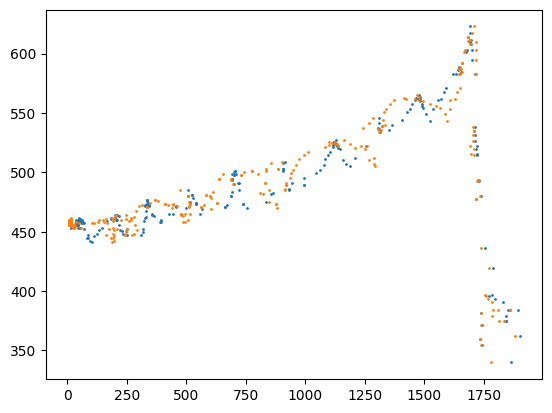

In [57]:
plt.scatter(rankles.T[0], rankles.T[1], s=1)
plt.scatter(lankles.T[0], rankles.T[1], s=1)